In [28]:
# Cell 1: Import required libraries
# Importing essential libraries for data handling, analysis, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns

# Display plots inline in the notebook
%matplotlib inline


In [29]:
# Cell 2: Load the California Housing dataset
# Loading the California Housing dataset into a Pandas DataFrame for easy manipulation.
data = fetch_california_housing(as_frame=True)
df = data.frame

# Displaying the first few rows of the dataset to understand its structure.
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
# Cell 3: Basic information and summary statistics
# Understanding the data structure, data types, and checking for missing values.
print("Basic Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values across the dataset
print("\nMissing Values:")
print(df.isnull().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.00

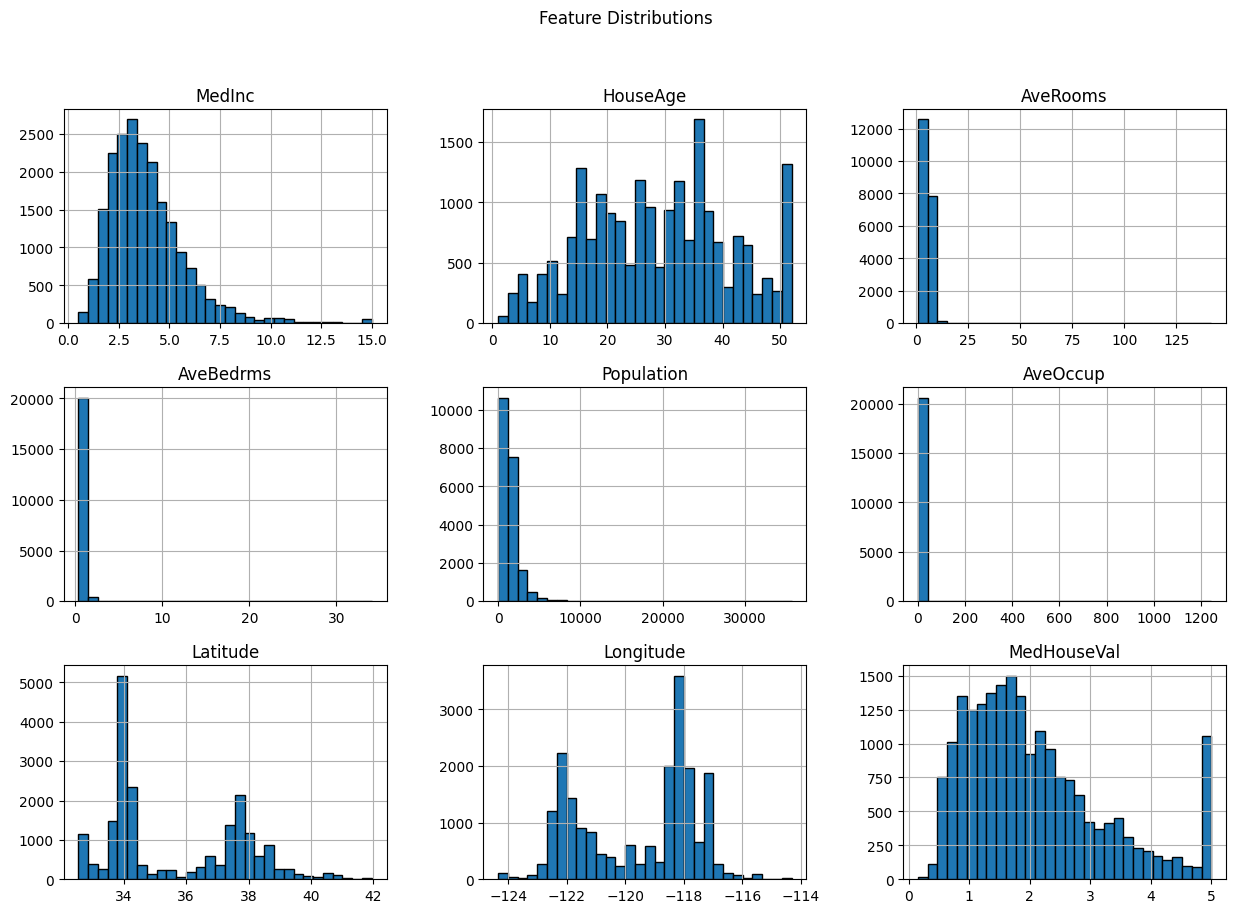

In [31]:
# Cell 4: Visualize the distribution of each feature
# Plotting histograms for all numerical features to check their distribution.
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


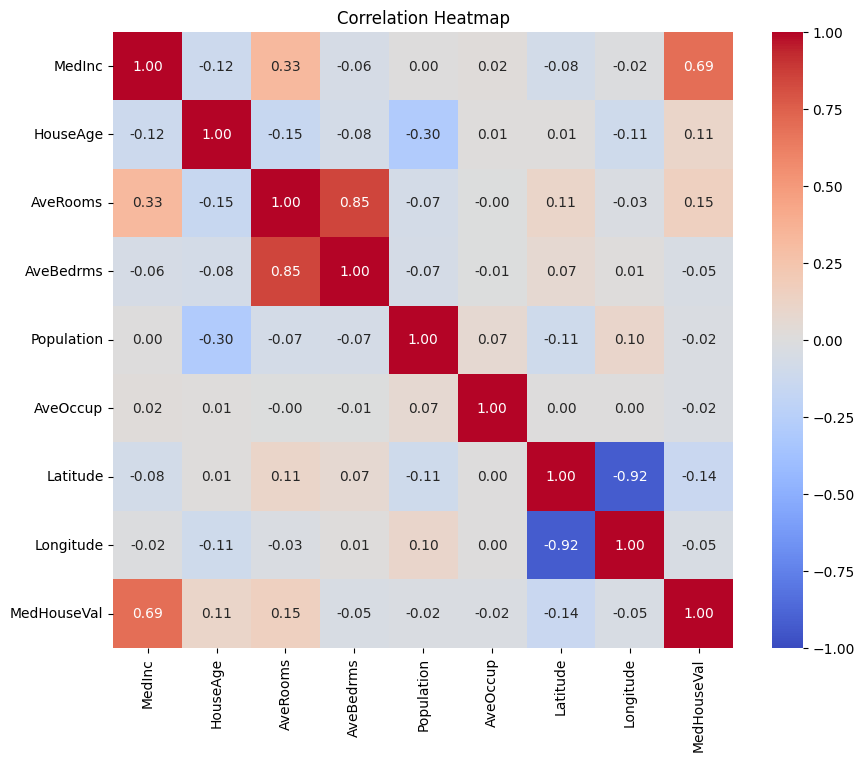

In [32]:
# Cell 5: Correlation matrix and heatmap
# Calculating and visualizing correlations between features to identify relationships.
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


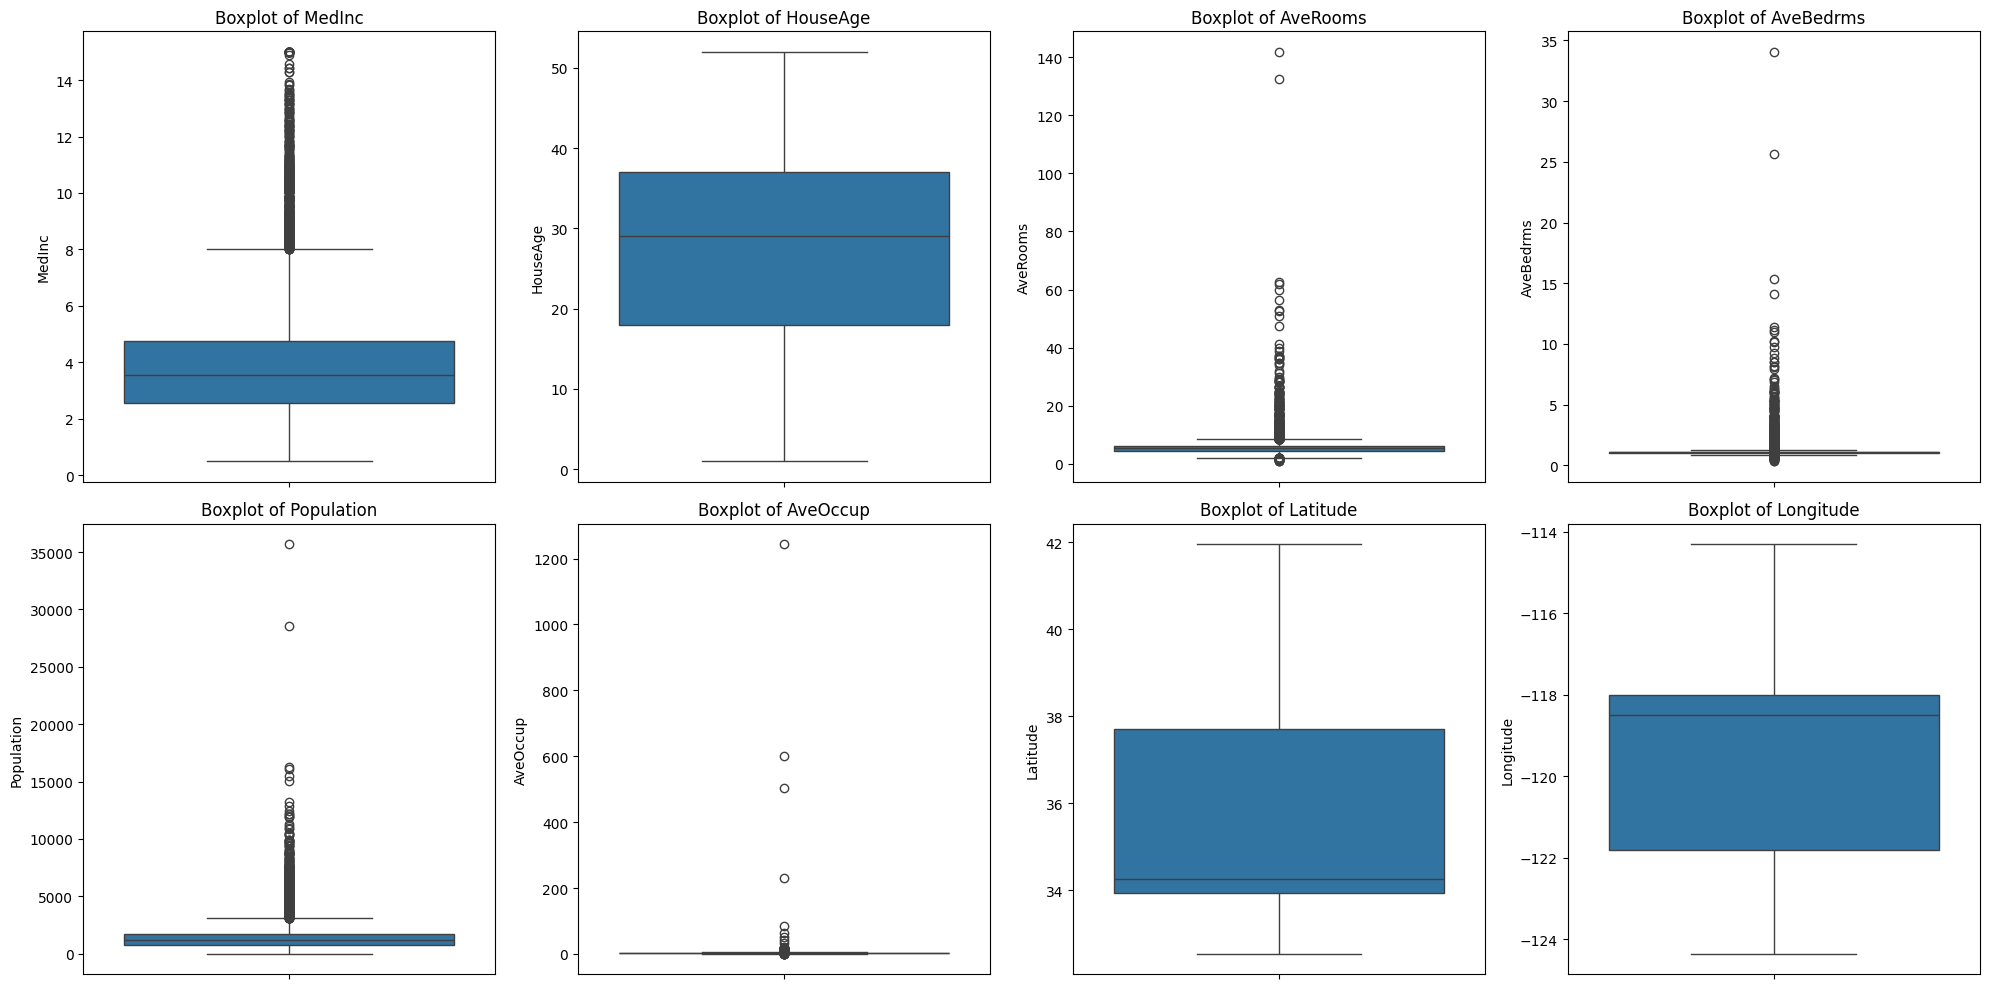

In [33]:
# Cell 6: Checking for outliers
# Using boxplots to identify potential outliers in numerical features.
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns[:-1]):  # Exclude the target column for now
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


In [34]:
# Cell 7: Handling outliers and scaling (Optional)
# Dropping extreme outliers using z-score threshold.
from scipy.stats import zscore

# Calculate z-scores for all numerical columns.
z_scores = np.abs(zscore(df))
threshold = 3
df_cleaned = df[(z_scores < threshold).all(axis=1)]

print(f"Dataset shape before removing outliers: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned.shape}")


Dataset shape before removing outliers: (20640, 9)
Dataset shape after removing outliers: (19794, 9)


In [35]:
# Cell 8: Final cleaned dataset and feature-target separation
# Splitting the dataset into features (X) and the target variable (y).
X = df_cleaned.drop(columns=["MedHouseVal"])  # Exclude the target variable
y = df_cleaned["MedHouseVal"]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (19794, 8)
Target (y) shape: (19794,)


In [36]:
# Cell 9: Save cleaned data for next steps
# Saving the cleaned dataset as a CSV file for use in subsequent notebooks.
df_cleaned.to_csv("../data/cleaned_california_housing.csv", index=False)
print("Cleaned data saved to 'cleaned_california_housing.csv'.")


Cleaned data saved to 'cleaned_california_housing.csv'.
